_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
#!pip install --upgrade seaborn
#this is not necessary for us right now


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [6]:
%matplotlib inline 
#necessary so that we can show the vis in this notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False,
            'float_format': lambda x: '%.3f' % x
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## Load & look at data

In [8]:
#we can create a dictionary with the multiple datasets so that we are able to more easily access them

csv_dict = {
    'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
    'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
    'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
    'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
    'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'
}

dfs = {}

for k in csv_dict:
  dfs[k] = pd.read_csv(csv_dict[k])



In [11]:
#This will let us see what is in the datasets
#this format will not be very helpful as it is a bit messy. But it gives us an idea nonetheless
dfs

{'income':        geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
 0      afg  1800                       603                             
 1      afg  1801                       603                             
 2      afg  1802                       603                             
 3      afg  1803                       603                             
 4      afg  1804                       603                             
 5      afg  1805                       603                             
 6      afg  1806                       603                             
 7      afg  1807                       603                             
 8      afg  1808                       603                             
 9      afg  1809                       603                             
 10     afg  1810                       604                             
 11     afg  1811                       604                             
 12     afg  1812                       6

In [13]:
#income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [14]:
#lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [15]:
#population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [16]:
#entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [17]:
#concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [12]:
#income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

In [19]:
dfs['income'].head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [20]:
dfs['lifespan'].head()

,geo,time,life_expectancy_years
0,abw,1800,34.420
1,abw,1801,34.420
2,abw,1802,34.420
3,abw,1803,34.420
4,abw,1804,34.420


In [22]:
dfs['population'].head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [23]:
#pd.options.display.max_columns = 500
dfs['entities'].head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.000,NaN,coastline,12.500,-69.967,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.000,NaN,landlocked,33.000,66.000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.000,NaN,coastline,-12.500,18.500,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.000,NaN,coastline,18.217,-63.050,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [24]:
dfs['concepts'].head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


In [26]:
#these are the titles of the the ds
dfs.keys()

dict_keys(['income', 'lifespan', 'population', 'entities', 'concepts'])

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [29]:
#We will need to begin identifying the columns we need and merging data
#Year | Country | Region | Income | Lifespan | Population
#1818 | USA | Americas | ### | ## | #
#1918	USA	Americas	####	###	##
#2018	USA	Americas	#####	###	###
#1818	China	Asia	#	#	#
#1918	China	Asia	##	##	###
#2018	China	Asia	###	###	#####;



In [49]:
#the dfs income, lifespan, and population have the last three columns we need
df = pd.merge(dfs['income'], dfs['lifespan']) #now merge with the population df
df = pd.merge(df, dfs['population'])

In [50]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.210,3280000
1,afg,1801,603,28.200,3280000
2,afg,1802,603,28.190,3280000
3,afg,1803,603,28.180,3280000
4,afg,1804,603,28.170,3280000


In [ ]:
#we have 4 of the 6 columns so far.

In [52]:
df = pd.merge(df, dfs['entities'][['country', 'name', 'world_6region']], left_on='geo', right_on='country')

df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.210,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.200,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.190,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.180,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.170,3280000,afg,Afghanistan,south_asia


In [53]:
df = df[['time', 'name', 'world_6region', 'income_per_person_gdppercapita_ppp_inflation_adjusted', 'life_expectancy_years', 'population_total']]
df.head()

,time,name,world_6region,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,1800,Afghanistan,south_asia,603,28.210,3280000
1,1801,Afghanistan,south_asia,603,28.200,3280000
2,1802,Afghanistan,south_asia,603,28.190,3280000
3,1803,Afghanistan,south_asia,603,28.180,3280000
4,1804,Afghanistan,south_asia,603,28.170,3280000


In [54]:
col_name_map = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}

df = df.rename(columns=col_name_map)
df.head()

,year,country,region,income,lifespan,population
0,1800,Afghanistan,south_asia,603,28.210,3280000
1,1801,Afghanistan,south_asia,603,28.200,3280000
2,1802,Afghanistan,south_asia,603,28.190,3280000
3,1803,Afghanistan,south_asia,603,28.180,3280000
4,1804,Afghanistan,south_asia,603,28.170,3280000


In [55]:
df.shape

(40437, 6)

## Explore data

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
country       40437 non-null object
region        40437 non-null object
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [57]:
df.dtypes

year            int64
country        object
region         object
income          int64
lifespan      float64
population      int64
dtype: object

In [58]:
df.describe()

,year,income,lifespan,population
count,40437.000,40437.000,40437.000,40437.000
mean,1909.293,4619.493,43.132,13712042.573
std,63.309,10209.571,16.313,66063348.915
min,1800.000,247.000,1.000,2128.000
25%,1854.000,876.000,31.160,411331.000
50%,1909.000,1442.000,35.500,1985952.000
75%,1964.000,3488.000,55.970,6499707.000
max,2018.000,177522.000,84.170,1415045928.000


## Plot visualization

       year        country   region  income  lifespan  population
38028  1800  United States  america    2127    39.410     6801854
38029  1801  United States  america    2167    39.410     6933517
38030  1802  United States  america    2202    39.410     7067728
38031  1803  United States  america    2166    39.410     7204538
38032  1804  United States  america    2165    39.410     7343995
38033  1805  United States  america    2209    39.410     7486152
38034  1806  United States  america    2251    39.410     7631061
38035  1807  United States  america    2273    39.410     7778775
38036  1808  United States  america    2113    39.410     7929348
38037  1809  United States  america    2217    39.410     8082836
38038  1810  United States  america    2282    39.410     8294928
38039  1811  United States  america    2326    39.410     8461458
38040  1812  United States  america    2287    39.410     8637266
38041  1813  United States  america    2312    39.410     8822188
38042  181

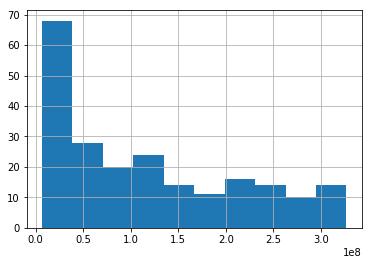

In [68]:
usa = df[df['country'] == 'United States']
print(usa)
usa['population'].hist()


In [ ]:
sns.distplot

## Analyze outliers

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project